# **Warsztaty analiza single cell - podstawy**

## Load libraries


In [ ]:
# We use harmonypy to integrate single-cell data stored in an AnnData object.
%pip install --quiet anndata scanpy harmonypy igraph leidenalg celltypist
# !wget https://openproblems-data.s3.amazonaws.com/resources/datasets/openproblems_v1/immune_cells/log_cp10k/dataset.h5ad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 54.1 MB/s eta 0:00:00


In [ ]:
# Importing the necessary libraries
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import celltypist
from celltypist import models

Data set from: https://openproblems.bio/datasets/openproblems_v1/immune_cells

In [ ]:
!gdown https://drive.google.com/uc?id=1NnyUc1IZMyIrb6WhpYx9wgUUwxDlIcTb -O dataset_raw.h5ad
!gdown https://drive.google.com/uc?id=1RtIDaTgK2lxeWT1xlkCEIsx5pshFRUZq -O dataset_ref.h5ad

Downloading...
From (original): https://drive.google.com/uc?id=1NnyUc1IZMyIrb6WhpYx9wgUUwxDlIcTb
From (redirected): https://drive.google.com/uc?id=1NnyUc1IZMyIrb6WhpYx9wgUUwxDlIcTb&confirm=t&uuid=78aef1f0-ff53-4fb8-8be2-0c5202cd242b
To: /content/dataset_raw.h5ad
100% 416M/416M [00:17<00:00, 24.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1RtIDaTgK2lxeWT1xlkCEIsx5pshFRUZq
From (redirected): https://drive.google.com/uc?id=1RtIDaTgK2lxeWT1xlkCEIsx5pshFRUZq&confirm=t&uuid=21416935-f2ed-48c3-9b0e-6c5dd32b4e7e
To: /content/dataset_ref.h5ad
100% 839M/839M [00:13<00:00, 64.4MB/s]


## Loading Data & Exploring the AnnData Object

In single cell analysis, the AnnData object is a core data structure used by popular libraries such as Scanpy. It stores both the raw data (e.g., gene expression matrices) and metadata (e.g., cell annotations) in an efficient and well-organized manner. By understanding how to load and interact with this object, you’ll be well-equipped to carry out downstream analyses such as quality control, normalization, clustering, and visualization.

**Task 1**: Loading the Data

In [ ]:
adata = sc.read_h5ad("dataset_raw.h5ad")
adata #  Lets see how it looks like

AnnData object with n_obs × n_vars = 16750 × 12303
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'sample_ID', 'size_factors', 'species', 'study', 'tissue'
    var: 'n_cells', 'feature_name', 'hvg', 'hvg_score'
    layers: 'counts'

**Task 2** : Exploring the AnnData object metadata

In [ ]:
# Print the number of cells and genes
print(f"Number of cells: {...}")
print(f"Number of genes: {...}")

# Print number of batches
# (hint: in pandas you can use pandas.DataFrame.column.unique() method on column
# to get list of unique values and combine it with function len() to get the number)
print(f"Number of batches: {...}")

# Print unique species
print(f"Species: {...}")

Number of cells: 16750
Number of genes: 12303
Number of batches: 10
Species: ['Human']


**Step 3**: Exploring the AnnData object features

In [ ]:
# Find where the names of genes are stored and print first 10
print(f"First 10 genes name: {...}")

First 10 genes name: ['LINC00115', 'FAM41C', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'HES4', 'ISG15', 'AGRN', 'TTLL10']


## Quality Control (QC)

The goal of quality control is to identify and remove cells or genes that may introduce noise into your dataset. This process helps ensure that downstream analyses are more reliable.

Start by identifying genes associated with ribosomal function, mitochondrial activity, and hemoglobin expression. These genes often serve as quality control markers

**Task 4** : Identify QC marker genes

In [ ]:
adata.var['mt'] =  #  adata.<place where the gene names are stored>.str.startswith('<how to recognize mitocchondrial genes in human?>')
adata.var['ribo'] =  #  adata.<place where the gene names are stored>.str.startswith('<how to recognize ribosomal genes in human?>')
adata.var['hb'] =  #  adata.<place where the gene names are stored>.str.startswith('<how to recognize hemoglobin genes in human?>')

In [ ]:
# Lets calculate the QC statisctis for our dataset and look where they are

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo', 'hb'], percent_top=None, inplace=True)
adata

AnnData object with n_obs × n_vars = 16750 × 12303
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'sample_ID', 'size_factors', 'species', 'study', 'tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'n_cells', 'feature_name', 'hvg', 'hvg_score', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'counts'

Try to answer what following columns can describe:

* `n_genes_by_counts` -

* `total_counts` -

* `pct_counts_mt` -

Now lets visualize it

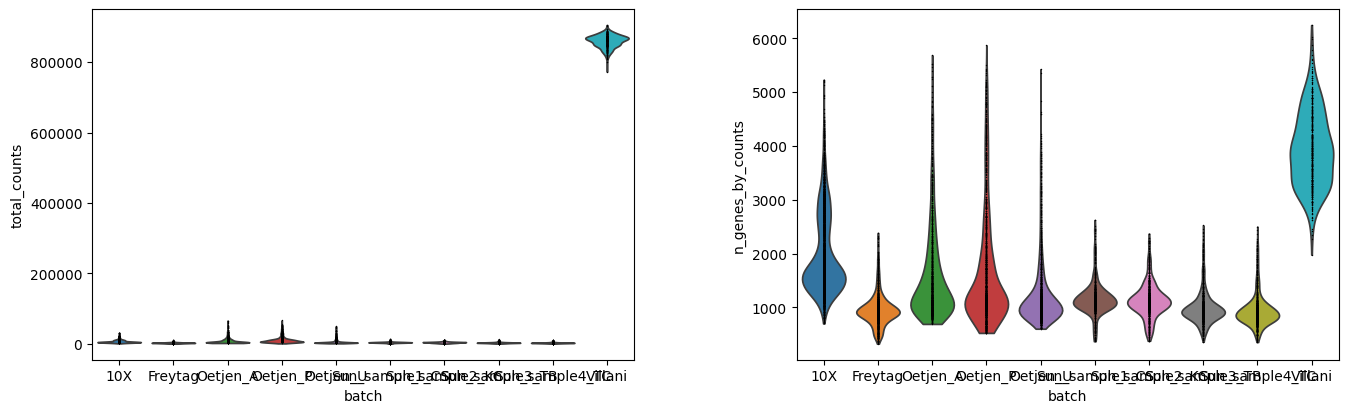

In [ ]:
sc.pl.violin(
    adata,
    ['total_counts', 'n_genes_by_counts'],
    groupby='batch',
    jitter=False,
    multi_panel=True,
)

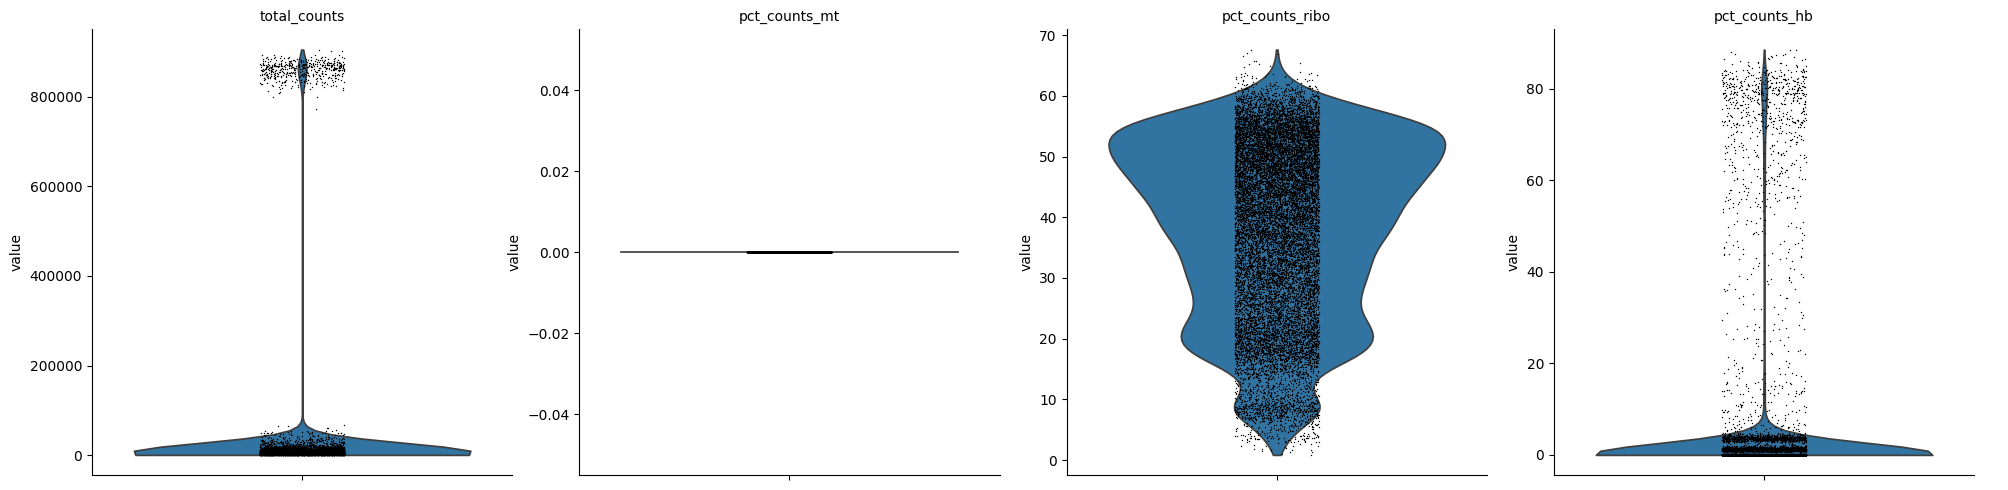

In [ ]:
sc.pl.violin(
    adata,
    ['total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb'],
    multi_panel=True,
)

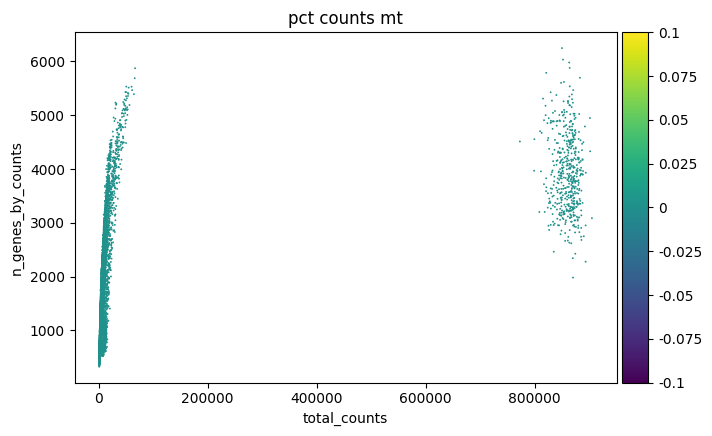

In [ ]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

**Task 5** Perform filter cells and genes based on condition below. To do that you can use `sc.pp.filter_cells` and `sc.pp.filter_genes` functions.

* Filter cells with < 200 genes

* Filter genes expressed in < 10 cells.


In [ ]:
# Filter
min_genes = 200
min_cells = 10

# Filtering
...
...

But thats not the end, lets do some more filtering

In [ ]:
# Step 3 Double detection

sc.pp.scrublet(adata, batch_key="batch")

In [ ]:
adata.obs.predicted_doublet.value_counts()

,count
predicted_doublet,
False,16475
True,275


In [ ]:
adata = adata[adata.obs['predicted_doublet'] == False, :]

**Task 6**: Check the value for predicted_doublet once again and plot it total_counts on violin plot (`sc.pl.violin()`)

predicted_doublet
False    16475
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1138: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1138:

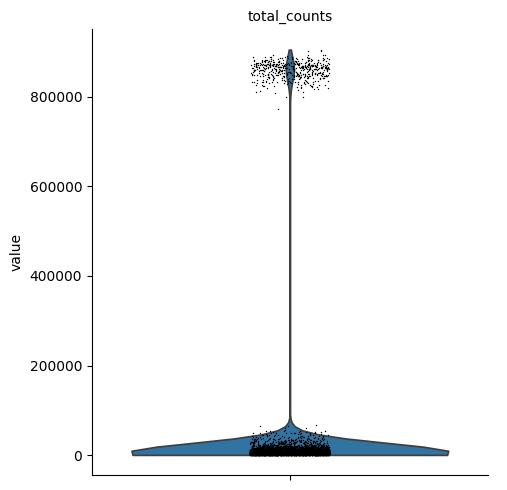

In [ ]:
# Print values counts for predicted_doublet
...

# Plot total counts
...

**Task 7** Filter our dataset based on condition below (hint: look at how we filtered adata object based on `predicted_doublet` column above)

* Filter out cells with total counts > 100000

* Filter out cells with hemoglobin % > 20 %


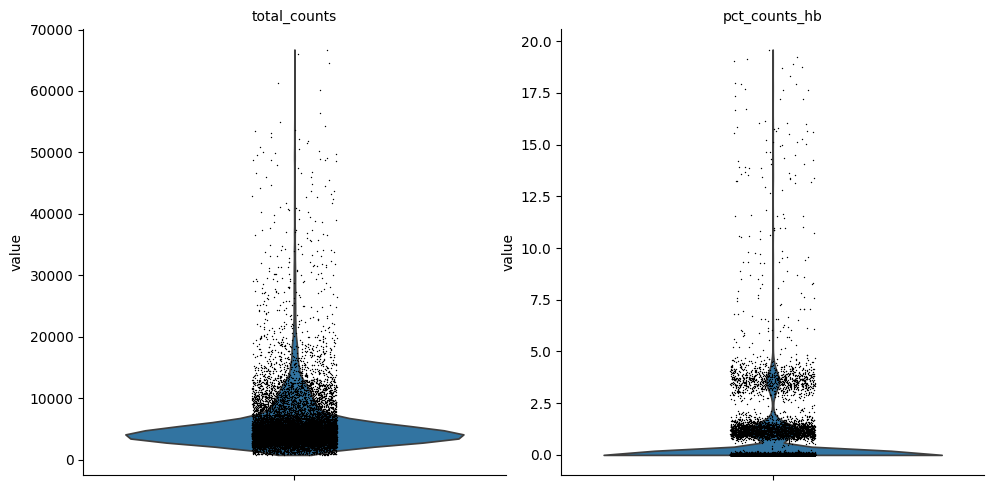

In [ ]:
# Filter adata object
adata = adata[... < 100000, :]
adata = adata[... < 20, :]

# Plot total_counts and, pct_counts_hb
...

## Normalization

Once quality control is complete, the next step is to normalize your data and pinpoint the genes that exhibit significant variability across cells. Normalization adjusts for differences in sequencing depth and technical noise, allowing for a fair comparison between cells. Identifying highly variable genes (HVGs) then helps focus the analysis on genes that drive biological variation, enhancing downstream tasks like clustering and trajectory inference.

----

**Normalization**

Normalization scales the gene expression values so that differences in library sizes across cells do not bias the results. Common methods, like scaling total counts per cell to a fixed value (e.g., 10,000 counts) and log-transforming the data, are used to ensure that each cell's expression profile is comparable.

**Task 8**: Normalize data, look were you can find them in our anndata object

Use `sc.pp.normalize_total` with parameter `target_sum=10**4` ,`layer='normalized'`, `inplace='False'` followed by `sc.pp.log1p()` with `copy=True'` and asigned output into `adata.layers["normalized"]` and `adata.layers["transformed"]`

Check out the documentation or ask in case of doubts:

https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.normalize_total.html

https://scanpy.readthedocs.io/en/stable/generated/scanpy.pp.log1p.html

In [ ]:
# Normalize
...

# Log1p transform
...

# Show the anndata object
adata

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 15119 × 12209
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'sample_ID', 'size_factors', 'species', 'study', 'tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'n_cells', 'feature_name', 'hvg', 'hvg_score', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'batch_colors', 'scrublet'
    layers: 'counts', 'normalized', 'transformed'

Now we need to set the default counts metrix to show transformed counts

In [ ]:
adata.X = adata.layers['transformed'].copy()

**Highly Variable Genes**

After normalization, identifying HVGs allows you to concentrate on the most informative features. HVGs capture the biological differences between cells and reduce the dimensionality of your dataset, making subsequent analyses more robust and computationally efficient.

**Task 9**: Identify HVGs and filter anndata object (hint look how we filtered anndata based on column values in adata.obs, no we need to filter genes -> `adata[:, <selected_genes>]`

Use `sc.pp.highly_variable_genes` with `n_top_genes=2000` for hgv identification

In [ ]:
# HVG selection
...

# Filtering
...

## Dimension reduction and Visualization

After normalizing your data and identifying highly variable genes, the next step is to reduce the data's complexity using dimension reduction techniques. By projecting high-dimensional data into two or three dimensions, you can visually explore and interpret the underlying structure of your dataset.

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_pca/__init__.py:379: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


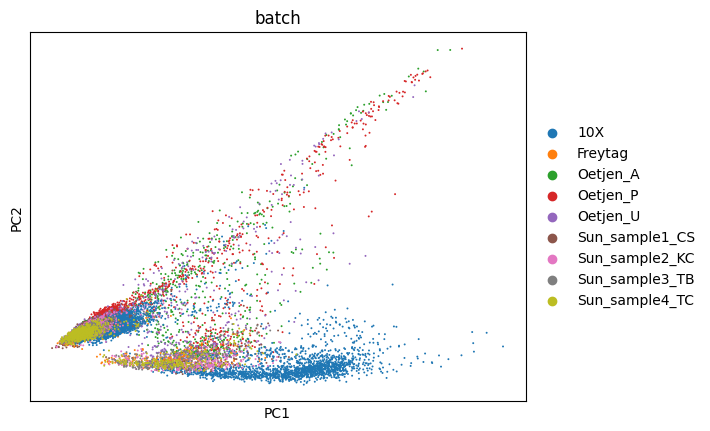

In [ ]:
# PCA
sc.pp.pca(adata_hgv, n_comps=30)
sc.pl.pca(adata_hgv, color='batch')

In [ ]:
# TSNE
sc.tl.tsne(adata_hgv, use_rep="X_pca")

# UMAP
sc.pp.neighbors(adata_hgv)
sc.tl.umap(adata_hgv)

**Task 10** Plot tsne and umap projections using `sc.pl.tsne` and `sc.pl.umap()`

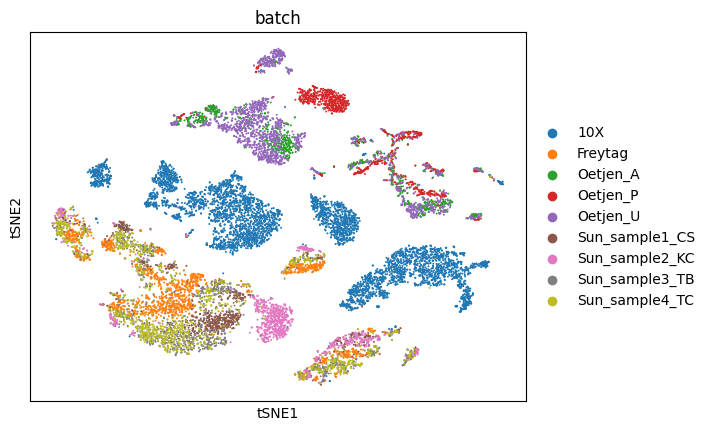

In [ ]:
# Plot tsne
...

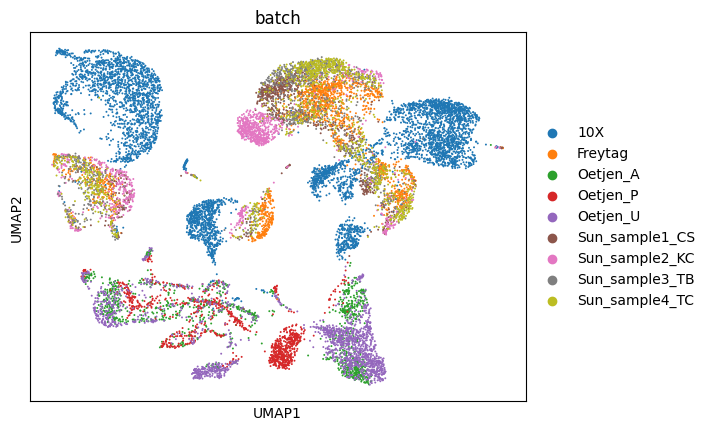

In [ ]:
# Plot umap
...

## Integration

In many single-cell studies, data are collected from different experiments, batches, or conditions. Integration is the process of aligning these datasets to correct for batch effects and other technical variations, allowing for a unified analysis that reflects genuine biological differences rather than artifacts of sample processing.

In [ ]:
# Lets perform harmony integration together

sc.external.pp.harmony_integrate(adata_hgv, key='batch', basis='X_pca')

2025-03-29 16:21:55,771 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2025-03-29 16:22:00,120 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2025-03-29 16:22:00,225 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2025-03-29 16:22:09,868 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2025-03-29 16:22:15,679 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2025-03-29 16:22:23,546 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2025-03-29 16:22:29,244 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2025-03-29 16:22:37,114 - harmonypy - INFO - Iteration 6 of 10
INFO:harmonypy:Iteration 6 of 10
2025-03-29 16:22:42,832 - harmonypy - INFO - Converged after 6 iterations
INFO:harmonypy:Converged after 6 iterations


**Task 11**: Recalculate umap on new corrected embeddings `use_rep='X_pca_harmony'` and plot it. Look how we did it in secion Dimension reduction and Visualization

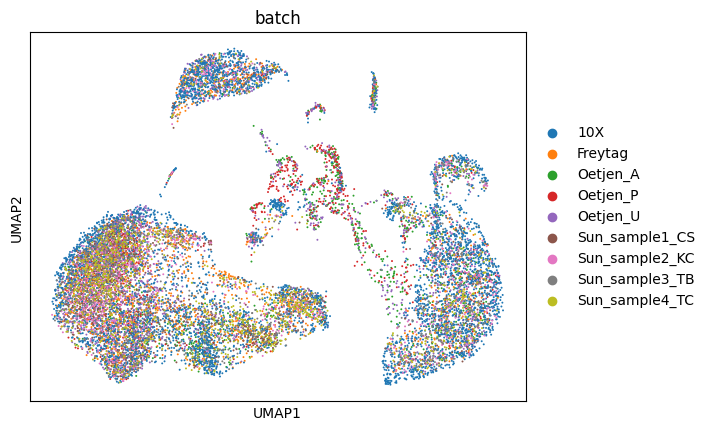

In [ ]:
# Recalculate umap
...

# Plot umap
...

## Annotation

Annotation is the process of assigning biological meaning to clusters identified in your single-cell dataset. This typically involves clustering cells based on their expression profiles, identifying cluster-specific marker genes, and then using these markers (along with automatic cell typing methods) to infer the cell types.

**Clustering**

Clustering groups cells with similar expression patterns into distinct clusters. These clusters often correspond to different cell types or states. Common algorithms include Louvain or Leiden clustering, which work well with the neighborhood graphs built from PCA or UMAP embeddings.

In [ ]:
sc.tl.leiden(adata_hgv, key_added="leiden_res0_4", resolution=0.4, flavor="igraph", n_iterations=2)

**Task 12**: Repeat clustering for `resolution=0.6` and `resolution=0.8`

In [ ]:
# resolution 0.6
...

# resolution 0.8
...

**Task 13**: Compare clustering using `sc.pl.umap()`, adjust the color parameter, if you pass the list here it will show plot for each color

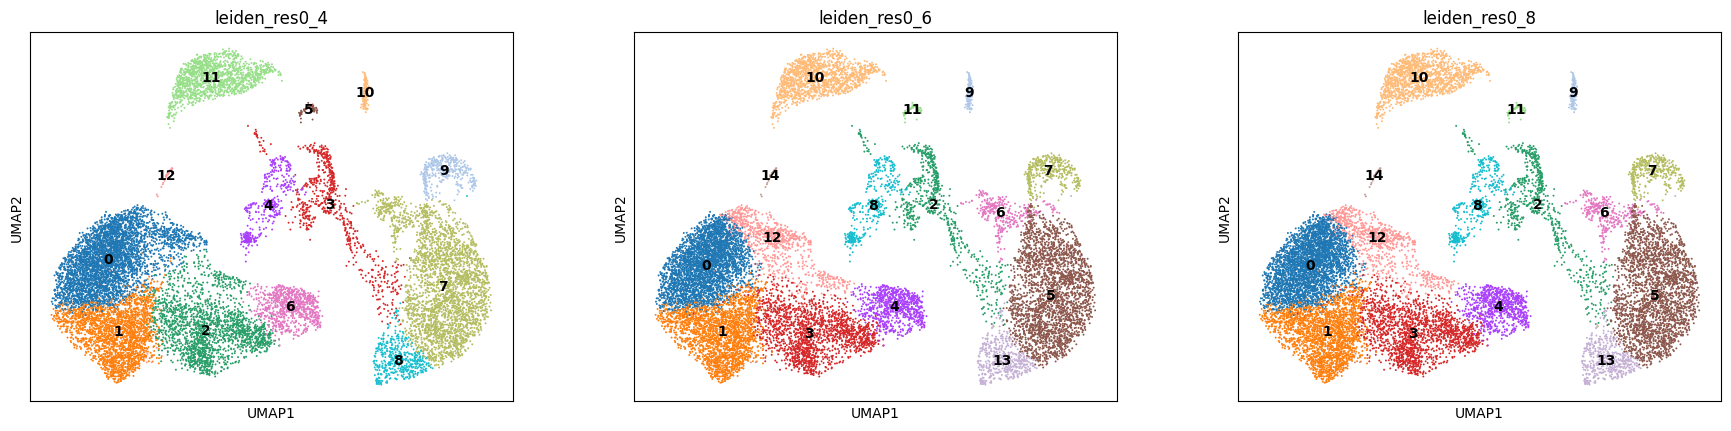

In [ ]:
# Plot Clustering

...

**Cluster Markers**

Once clusters are defined, the next step is to identify marker genes that are highly expressed in specific clusters. These markers help in characterizing the biological identity of each cluster and provide insights into underlying cell functions.

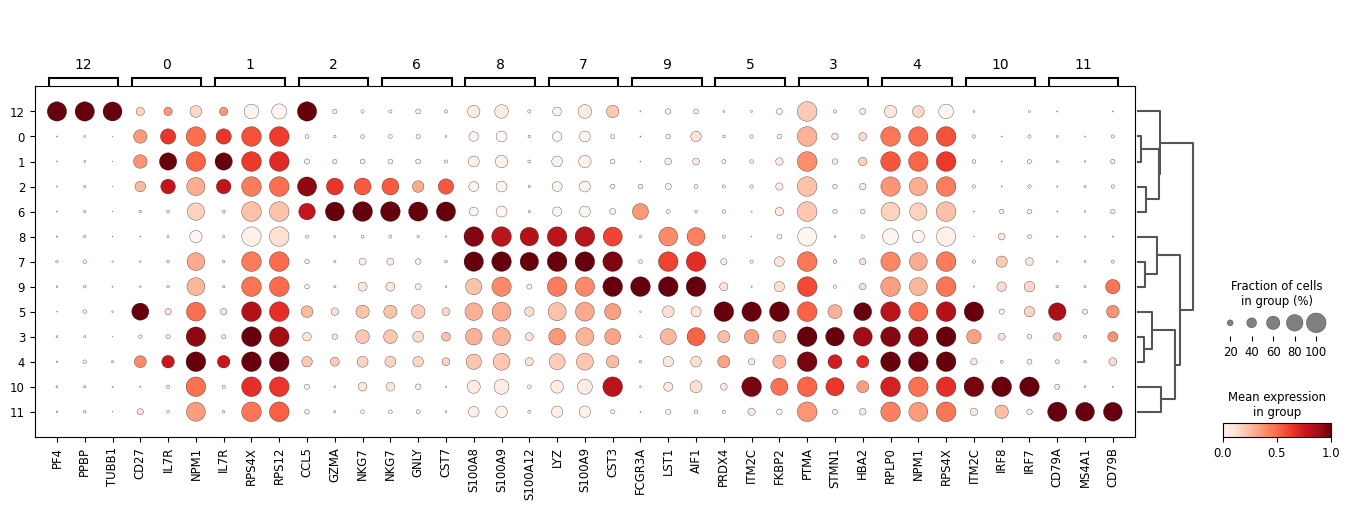

In [ ]:
sc.tl.rank_genes_groups(adata_hgv, groupby='leiden_res0_4', method='wilcoxon', key_added='markers_r04')

sc.pl.rank_genes_groups_dotplot(
    adata_hgv, groupby="leiden_res0_4", standard_scale="var", n_genes=3, key="markers_r04"
)

**Task 14**: Explore other resolution

**Cell typing**

After clustering and identifying marker genes, the next crucial step is cell typing, where we assign biological identities to clusters. This step helps interpret the data by linking clusters to known cell types based on gene expression patterns. Cell typing can be done manually (using marker genes) or automatically (using computational reference-based methods)

In [ ]:
adata_hgv.X = adata_hgv.X.toarray()

In [ ]:
models.download_models(
    force_update=True, model=["Immune_All_Low.pkl", "Immune_All_High.pkl"]
)

In [ ]:
model_low = models.Model.load(model="Immune_All_Low.pkl")

In [ ]:
print(f"Low level cell types {model_low.cell_types}")

Low level cell types ['Age-associated B cells' 'Alveolar macrophages' 'B cells'
 'CD16+ NK cells' 'CD16- NK cells' 'CD8a/a' 'CD8a/b(entry)' 'CMP'
 'CRTAM+ gamma-delta T cells' 'Classical monocytes' 'Cycling B cells'
 'Cycling DCs' 'Cycling NK cells' 'Cycling T cells'
 'Cycling gamma-delta T cells' 'Cycling monocytes' 'DC' 'DC precursor'
 'DC1' 'DC2' 'DC3' 'Double-negative thymocytes'
 'Double-positive thymocytes' 'ELP' 'ETP' 'Early MK' 'Early erythroid'
 'Early lymphoid/T lymphoid' 'Endothelial cells' 'Epithelial cells'
 'Erythrocytes' 'Erythrophagocytic macrophages' 'Fibroblasts'
 'Follicular B cells' 'Follicular helper T cells' 'GMP'
 'Germinal center B cells' 'Granulocytes' 'HSC/MPP' 'Hofbauer cells' 'ILC'
 'ILC precursor' 'ILC1' 'ILC2' 'ILC3' 'Intermediate macrophages'
 'Intestinal macrophages' 'Kidney-resident macrophages' 'Kupffer cells'
 'Large pre-B cells' 'Late erythroid' 'MAIT cells' 'MEMP' 'MNP'
 'Macrophages' 'Mast cells' 'Megakaryocyte precursor'
 'Megakaryocyte-erythroid-

In [ ]:
predictions_low = celltypist.annotate(
    adata_hgv, model=model_low, majority_voting=True
)

predictions_low_adata = predictions_low.to_adata()

adata_hgv.obs["celltype_low"] = predictions_low_adata.obs.loc[
    adata_hgv.obs.index, "majority_voting"
]

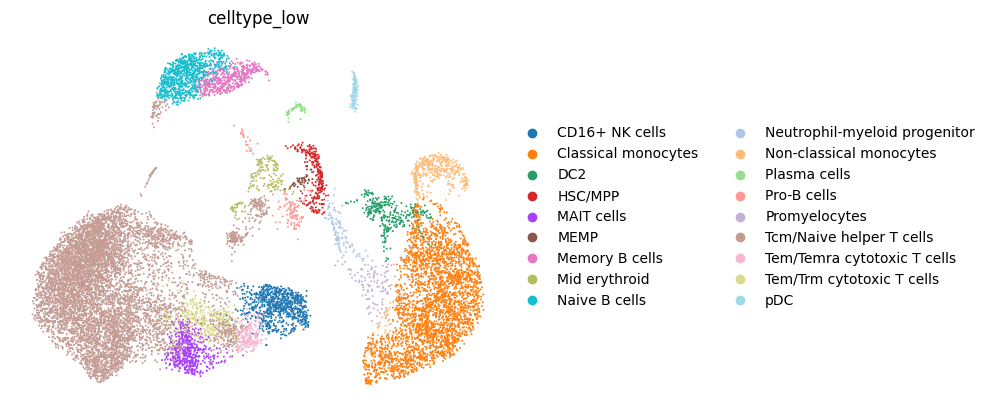

In [ ]:
sc.pl.umap(
    adata_hgv,
    color='celltype_low',
    frameon=False,
    sort_order=False,
    wspace=1,
)

**Task** 15: To the same for high level cell types

In [ ]:
model_high = models.Model.load(model="Immune_All_High.pkl")